In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(2024)

class LinearRegressionBatchGD:
    def __init__(self, learning_rate=0.0001, max_epochs=10, batch_size=32):
        '''
        Initializing the parameters of the model
    
        Args:
          learning_rate : learning rate for batch gradient descent
          max_epochs : maximum number of epochs that the batch gradient descent algorithm will run for
          batch-size : size of the batches used for batch gradient descent.
    
        Returns:
          None
        '''
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.batch_size = batch_size
        self.weights = None

    def fit(self, X, y, plot=True):
        '''
        This function is used to train the model using batch gradient descent.
    
        Args:
          X : 2D numpy array of training set data points. Dimensions (n x (d+1))
          y : 2D numpy array of target values in the training dataset. Dimensions (n x 1)
    
        Returns :
          None
        '''
        if self.batch_size is None:
            self.batch_size = X.shape[0]

        # Initialize the weights
        if self.weights is None:
            self.weights = np.zeros((X.shape[1],1))

        prev_weights = self.weights

        self.error_list = []  #stores the loss for every epoch
        for epoch in range(self.max_epochs):

            batches = create_batches(X, y, self.batch_size)
            for batch in batches:
                X_batch, y_batch = batch  #X_batch and y_batch are data points and target values for a given batch

                # Complete the inner "for" loop to calculate the gradient of loss w.r.t weights, i.e. dw and update the weights
                # You should use "compute_gradient()"  function to calculate gradient.
                f = X_batch @ self.weights
                dw = self.compute_gradient(X_batch, y_batch, self.weights)
                self.weights = self.weights - self.learning_rate * dw


            # After the inner "for" loop ends, calculate loss on the entire data using "compute_rmse_loss()" function and add the loss of each epoch to the "error list"
            loss = self.compute_rmse_loss(X, y, self.weights)
            self.error_list.append(loss)

            if np.linalg.norm(self.weights - prev_weights) < 1e-5:
                print(f" Stopping at epoch {epoch}.")
                break

        if plot:
            plot_loss(self.error_list, self.max_epochs)

    def predict(self, X):
        '''
        This function is used to predict the target values for the given set of feature values
    
        Args:
          X: 2D numpy array of data points. Dimensions (n x (d+1))
    
        Returns:
          2D numpy array of predicted target values. Dimensions (n x 1)
        '''
        return X @ self.weights

    def compute_rmse_loss(self, X, y, weights):
        '''
        This function computes the Root Mean Square Error (RMSE)
    
        Args:
          X : 2D numpy array of data points. Dimensions (n x (d+1))
          y : 2D numpy array of target values. Dimensions (n x 1)
          weights : 2D numpy array of weights of the model. Dimensions ((d+1) x 1)
    
        Returns:
          loss : 2D numpy array of RMSE loss. float
        '''
        return np.sqrt(np.mean((y - X @ weights)**2))
    
    def compute_rounded_rmse_loss(self, X, y, weights):
        '''
        This function computes the Root Mean Square Error (RMSE)
    
        Args:
          X : 2D numpy array of data points. Dimensions (n x (d+1))
          y : 2D numpy array of target values. Dimensions (n x 1)
          weights : 2D numpy array of weights of the model. Dimensions ((d+1) x 1)
    
        Returns:
          loss : 2D numpy array of RMSE loss. float
        '''
        return np.sqrt(np.mean((y - (X @ weights).round())**2))

    def compute_gradient(self, X, y, weights):
        '''
        This function computes the gradient of mean squared-error loss w.r.t the weights
    
        Args:
          X : 2D numpy array of data points. Dimensions (n x (d+1))
          y : 2D numpy array of target values. Dimensions (n x 1)
          weights : 2D numpy array of weights of the model. Dimensions ((d+1) x 1)
    
        Returns:
          dw : 2D numpy array of gradients w.r.t weights. Dimensions ((d+1) x 1)
        '''
        return -2 * X.T @ (y - X @ weights) / X.shape[0]

def plot_loss(error_list, total_epochs):
    '''
    This function plots the loss for each epoch.
  
    Args:
      error_list : list of validation loss for each epoch
      total_epochs : Total number of epochs
    Returns:
      None
    '''
    # Complete this function to plot the graph of losses stored in model's "error_list"
    plt.plot(np.arange(total_epochs), error_list)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss vs Epochs')
    plt.show()

def plot_learned_equation(X, y, y_hat):
    '''
    This function generates the plot to visualize how well the learned linear equation fits the dataset  

    Args:
      X : 2D numpy array of data points. Dimensions (n x 2)
      y : 2D numpy array of target values. Dimensions (n x 1)
      y_hat : 2D numpy array of predicted values. Dimensions (n x 1)

    Returns:
      None
    '''
    # Plot a 2d plot, with only  X[:,1] on x-axis (Think on why you can ignore X[:, 0])
    # Use y_hat to plot the line. DO NOT use y.
    plt.plot(X[:, 1], y_hat, label='Predicted line')
    plt.scatter(X[:, 1], y, label='Data points', color='g')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.title('Linear Regression with Batch Gradient Descent')
    plt.show()

############################################
#####        Helper functions          #####
############################################
def generate_toy_dataset():
    '''
    This function generates a simple toy dataset containing 300 points with 1d feature 
    '''
    X = np.random.rand(300, 2)
    X[:, 0] = 1 # bias term
    weights = np.random.rand(2,1)
    noise = np.random.rand(300,1) / 32
    y = np.matmul(X, weights) + noise

    X_train = X[:250]
    X_test = X[250:]
    y_train = y[:250]
    y_test = y[250:]

    return X_train, y_train, X_test, y_test

def create_batches(X, y, batch_size):
    '''
    This function is used to create the batches of randomly selected data points.
  
    Args:
      X : 2D numpy array of data points. Dimensions (n x (d+1))
      y : 2D numpy array of target values. Dimensions (n x 1)
  
    Returns:
      batches : list of tuples with each tuple of size batch size.
    '''
    batches = []
    data = np.hstack((X, y))
    np.random.shuffle(data)
    num_batches = data.shape[0]//batch_size
    i = 0
    for i in range(num_batches+1):
        if i<num_batches:
            batch = data[i * batch_size:(i + 1)*batch_size, :]
            X_batch = batch[:, :-1]
            Y_batch = batch[:, -1].reshape((-1, 1))
            batches.append((X_batch, Y_batch))
        if data.shape[0] % batch_size != 0 and i==num_batches:
            batch = data[i * batch_size:data.shape[0]]
            X_batch = batch[:, :-1]
            Y_batch = batch[:, -1].reshape((-1, 1))
            batches.append((X_batch, Y_batch))
    return batches


# Terminal text coloring
RESET = '\033[0m'
GREEN = '\033[32m'
RED = '\033[31m'

In [3]:
# Create datasets

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

def create_datasets(data):
    X = data.drop(['score', 'ID'], axis=1)
    y = data['score']
    X = np.array(X)
    y = np.array(y).reshape(-1, 1)
    return X, y

# Shuffle the data
train = train.sample(frac=1).reset_index(drop=True)

n_train = int(0.9 * train.shape[0])
X_train, y_train = create_datasets(train[:n_train])
X_val, y_val = create_datasets(train[n_train:])

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((31489, 64), (3499, 64), (31489, 1), (3499, 1))

In [92]:
# Feature engineering

# Mean and variance
mu = np.mean(X_train)
sigma = np.std(X_train)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def gaussian_basis(x):
    return np.exp(-0.5 * ((x - mu) / sigma)**2)

def normalize(X):
    return (X - mu) / sigma

def relu(x):
    return np.maximum(0, x)

basis = np.array([
    # ['sigmoid', sigmoid], 
    ['gaussian', gaussian_basis], 
    # ['relu', relu], 
    # ['normalize', normalize], 
    # ['polynomial', lambda x: x**2], 
    # ['sin', np.sin], 
    # ['cos', np.cos], 
    # ['tan', np.tan]
    # ['identity', lambda x: x], 
])

# Add polynomial features
def transform_input(X, basis):
    X_poly = X
    for i in range(basis.shape[0]):
        X_poly = np.hstack((X_poly, basis[i, 1](X)))
    return X_poly


X_train_poly = transform_input(X_train, basis)
X_val_poly = transform_input(X_val, basis)
print(X_train_poly.shape, X_val_poly.shape)

X_train_poly

(31489, 128) (3499, 128)


array([[ 1.16622864, -2.45068992,  0.26548102, ...,  0.91965058,
         0.9818237 ,  0.9966641 ],
       [ 3.8074223 , -0.44978807, -0.0121988 , ...,  0.99971675,
         0.99903392,  0.99380538],
       [-2.50461228, -0.31496572, -0.47211275, ...,  0.99999218,
         0.99952437,  0.99995337],
       ...,
       [-4.98934487,  2.00260126,  1.19476171, ...,  0.9955114 ,
         0.93273194,  0.97773577],
       [ 4.04810353, 11.88665404,  4.55790146, ...,  0.995994  ,
         0.90427797,  0.98650464],
       [ 0.25820368, -0.6160641 , -0.20673221, ...,  0.98705145,
         0.99228809,  0.99528427]])

In [98]:
# Train the model
model = LinearRegressionBatchGD(learning_rate=0.001, max_epochs=100, batch_size=32)

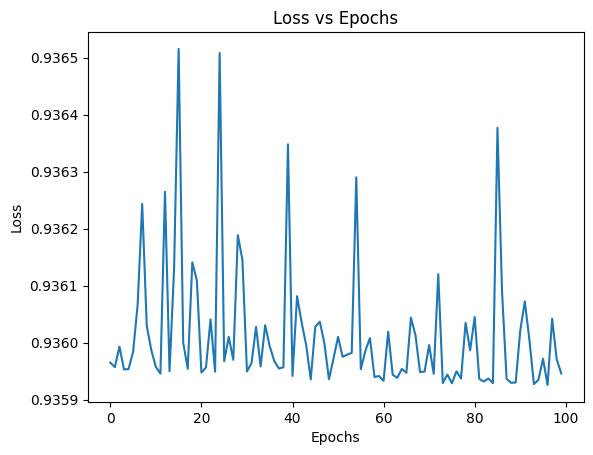

0.9600478696267442

In [103]:
model.learning_rate = 0.0001
model.batch_size = 128
model.fit(X_train_poly, y_train)
model.compute_rounded_rmse_loss(X_val_poly, y_val, model.weights)

In [104]:
# Use tensorflow for mass experiments (for performance reasons)
import tensorflow as tf
import pandas as pd

all_basis = np.array([
    # ['sigmoid', sigmoid],
    ['gaussian', gaussian_basis],
    # ['relu', relu],
    # ['normalize', normalize],
    # ['sin', np.sin],
    # ['tan', np.tan],
    ['polynomial', lambda x: x**2],
    # ['cos', np.cos],
])

def rounded_rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - tf.round(y_pred))))

results = np.array([])

n_experiments = 2**all_basis.shape[0]

for i in range(n_experiments):
    basis = all_basis[(i & (1 << np.arange(all_basis.shape[0])) > 0)]
    X_train_poly = transform_input(X_train, basis)
    X_val_poly = transform_input(X_val, basis)

    model = tf.keras.models.Sequential([
        tf.keras.Input(shape=(X_train_poly.shape[1],)),
        tf.keras.layers.Dense(1)
    ])

    opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=opt, loss='mean_squared_error', metrics=['root_mean_squared_error', rounded_rmse])
    history = model.fit(X_train_poly, y_train, validation_data=(X_val_poly, y_val), epochs=100, batch_size=64, verbose=0)
    res = {'basis': str(basis[:, 0]), 'rmse': history.history['root_mean_squared_error'][-1], 'rounded_rmse': history.history['rounded_rmse'][-1], 'rmse_val': history.history['val_root_mean_squared_error'][-1], 'rounded_rmse_val': history.history['val_rounded_rmse'][-1]}
    print(f'{i + 1}/{n_experiments}: {res["rmse"]}, {res["rounded_rmse"]}, {res["rmse_val"]}, {res["rounded_rmse_val"]}')
    res = np.array([res['basis'], res['rmse'], res['rounded_rmse'], res['rmse_val'], res['rounded_rmse_val']])
    results = np.append(results, res)


# Dataframe with columns: basis, rmse, rounded_rmse
results = results.reshape(-1, 5)
results_df = pd.DataFrame(results, columns=['basis', 'rmse', 'rounded_rmse', 'rmse_val', 'rounded_rmse_val'])
results_df

0/4: 0.9406694173812866, 0.9796655178070068, 0.9311515092849731, 0.9627998471260071
1/4: 0.938785195350647, 0.9751651287078857, 0.9265940189361572, 0.9609262347221375
2/4: 0.9607046842575073, 1.00178861618042, 0.9567806124687195, 0.9968282580375671
3/4: 0.9367742538452148, 0.9741500616073608, 0.9261729717254639, 0.9570701718330383


,basis,rmse,rounded_rmse,rmse_val,rounded_rmse_val
0,[],0.9406694173812866,0.9796655178070068,0.9311515092849731,0.9627998471260071
1,['gaussian'],0.938785195350647,0.9751651287078857,0.9265940189361572,0.9609262347221375
2,['polynomial'],0.9607046842575073,1.00178861618042,0.9567806124687195,0.9968282580375671
3,['gaussian' 'polynomial'],0.9367742538452148,0.9741500616073608,0.9261729717254639,0.9570701718330383


In [105]:
basis = np.array([
    ['gaussian', gaussian_basis], 
    ['polynomial', lambda x: x**2], 
])

X_train_poly = transform_input(X_train, basis)
X_val_poly = transform_input(X_val, basis)

model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(X_train_poly.shape[1],)),
    tf.keras.layers.Dense(1)
])

In [130]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['root_mean_squared_error', rounded_rmse])
history = model.fit(X_train_poly, y_train, validation_data=(X_val_poly, y_val), epochs=10, batch_size=1024)
model.evaluate(X_val_poly, y_val, verbose=0)

Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8685 - root_mean_squared_error: 0.9319 - rounded_rmse: 0.9772 - val_loss: 0.8572 - val_root_mean_squared_error: 0.9259 - val_rounded_rmse: 0.9542
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - loss: 0.8792 - root_mean_squared_error: 0.9377 - rounded_rmse: 0.9819 - val_loss: 0.8571 - val_root_mean_squared_error: 0.9258 - val_rounded_rmse: 0.9533
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - loss: 0.8783 - root_mean_squared_error: 0.9371 - rounded_rmse: 0.9803 - val_loss: 0.8571 - val_root_mean_squared_error: 0.9258 - val_rounded_rmse: 0.9531
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - loss: 0.8674 - root_mean_squared_error: 0.9313 - rounded_rmse: 0.9760 - val_loss: 0.8572 - val_root_mean_squared_error: 0.9258 - val_rounded_rmse: 0.9532
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - loss: 0.8713 - root_mean_squared_error: 0.9334 - rounded_rmse: 0.9792 - val_loss: 0.8572 - val_root_mean_squared_err

[0.857099175453186, 0.9257965087890625, 0.9493246674537659]

In [131]:
history.history['root_mean_squared_error'][-1], history.history['rounded_rmse'][-1], history.history['val_root_mean_squared_error'][-1], history.history['val_rounded_rmse'][-1]

(0.9354735612869263, 0.9809327125549316, 0.9257965087890625, 0.952698826789856)

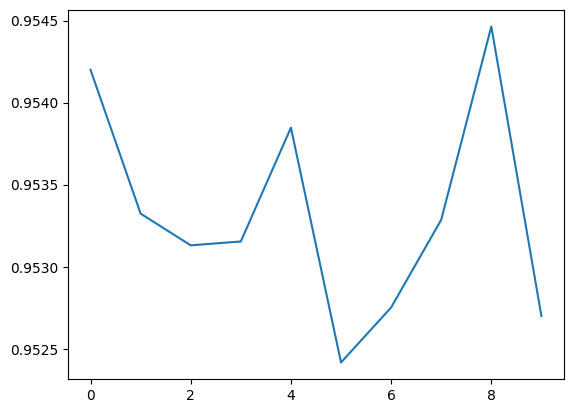

In [132]:
# Plot history
plt.plot(history.history['val_rounded_rmse'][:], label='rmse')

In [134]:
# Get output for final test data
X_final_test = np.array(test.drop('ID', axis=1))
X_final_test_poly = transform_input(X_final_test, basis)

y_final_test = model.predict(X_final_test_poly)
y_final_test = np.round(y_final_test)

output = pd.DataFrame({'ID': test['ID'], 'score': y_final_test.flatten()})

# output['score'] = output['score'].clip(0, 5)

# count score < 0
below0 = output[output['score'] < 0].shape[0]

# count score > 5
above5 = output[output['score'] > 5].shape[0]

print(output.shape[0], below0, above5)

output.to_csv('output_sept4_1.csv', index=False)


469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step
14996 0 0
